**Course** = BIL 470 Machine Learning<br/>
**Term** = 2022 Summer<br/>
**Name** = Mert Can GÖNEN<br/>
**ID** = 181101039<br/><br/>
<center><b>THE CONTENT SELECTOR FOR DISNEY PLUS USER</b></center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from Main import ContentSelector

# <span style="color: red;">Exploratory Data Analysis (EDA)</span>

### <span style="color: blue;">Read Dataset</span> 

**#** In this part, we display the first version of the dataset. There is no modification on it and it's datas.

In [2]:
cs = ContentSelector();
data = pd.read_csv("disney_plus_titles.csv");
display(data);

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


**#** Then we remove useless columns to avoid confusion. These columns are;

**1)** show_id => It is just a sequential number to make specific to content.<br/>
**2)** country => It indicates which country the movie is from.<br/>
**3)** date_added => It is the release year of the movie/TV show.<br/>
**4)** rating => It is about who can watch the movie, but we don't use the age of user. So, it is useless.

In [3]:
data = data.drop(columns="show_id");
data = data.drop(columns="country");
data = data.drop(columns="date_added");
data = data.drop(columns="rating");

**#** We check for duplicate datas. But there is no one.

In [4]:
display(data[data.duplicated()]);

,type,title,director,cast,release_year,duration,listed_in,description


**#** To create a meta data, we will use **title**, **cast**, **listed_in** and **description** columns. So, we don't want **any null row** in these columns.

In [5]:
data[['title', 'cast', 'listed_in', 'description']] = data[['title', 'cast', 'listed_in', 'description']].fillna('NA')
display(data);

,type,title,director,cast,release_year,duration,listed_in,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",2016,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",1988,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",2011,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",2021,41 min,Musical,"This is real life, not just fantasy!"
4,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",2021,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...
1445,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


#### Distribution of content in Disney Plus as movies and TV shows

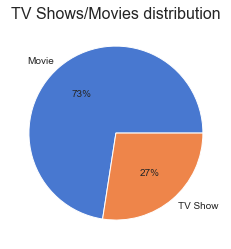

In [6]:
sb.set_style('darkgrid')
colors = sb.color_palette('muted')

sf_dist = data['type'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(sf_dist, labels=['Movie', 'TV Show'], colors=colors, autopct='%.0f%%')
plt.title('TV Shows/Movies distribution', fontsize=16)
plt.show()

#### Distribution of contents by years

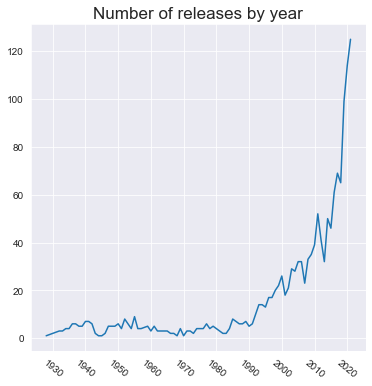

In [7]:
# realease years

rl_years = data['release_year'].value_counts()

plt.figure(figsize=(6,6))
sb.lineplot(x=rl_years.index, y=rl_years.values, data=rl_years)
plt.title('Number of releases by year',fontsize=17)
plt.xticks(np.arange(1930, 2022, 10), rotation=320)
plt.show()

#### Top directors of Disney Plus

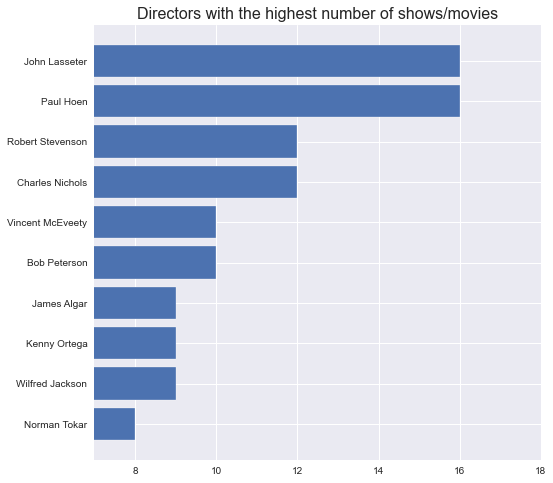

In [8]:
directors = data['director'].value_counts()[1:11]
directors = directors.iloc[::-1] # reversing the series

plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.barh(directors.index, directors.values)
plt.title('Directors with the highest number of shows/movies', fontsize=16)
plt.xlim([7,18])
plt.show()

**#** Top cast of Disney Plus (Without voice actors)

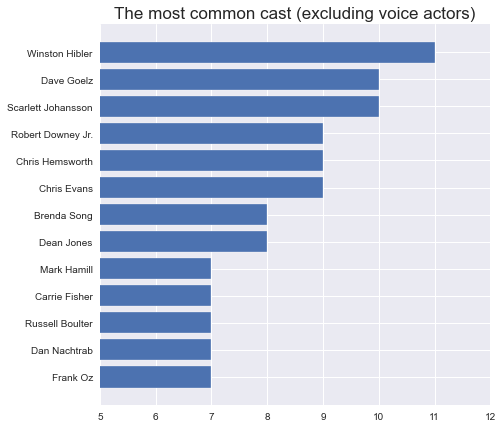

In [9]:
d = data[data['listed_in'].str.contains('Animation') == False]

actors = cs.get_unique(d, 'cast')

cast = pd.DataFrame(actors.items(), columns=['Name', 'Count'])
cast = cast.sort_values(by='Count', ascending=False)
cast = cast[1:14]
cast = cast.iloc[::-1]

plt.figure(figsize=(7,7))
plt.style.use('seaborn')
plt.barh(cast['Name'], cast['Count'])
plt.title('The most common cast (excluding voice actors)', fontsize=17)
plt.xlim([5,12])
plt.show()

#### Distribution of contents by duration

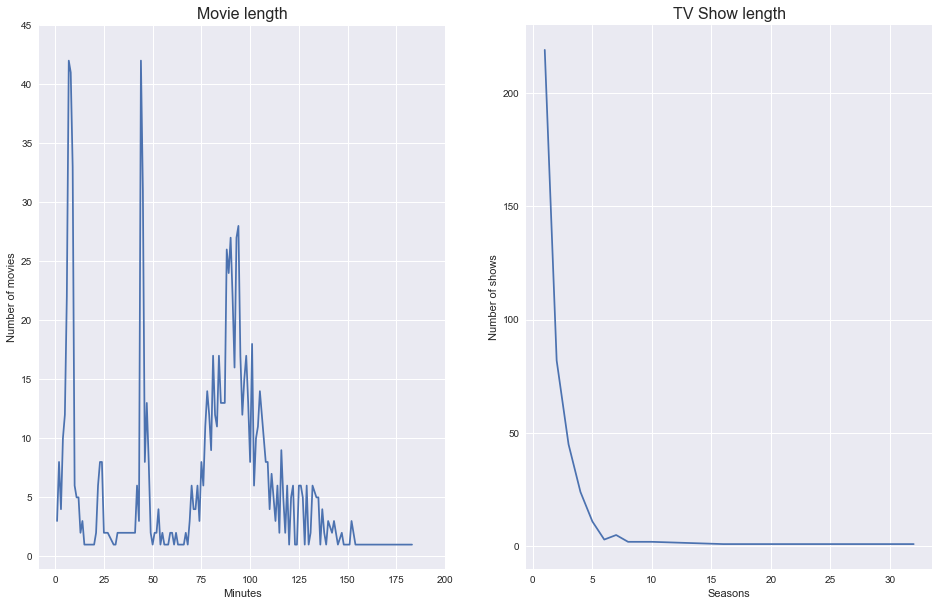

In [10]:
movies_durations = data[['type', 'duration']]
movies_durations = movies_durations[movies_durations.type == 'Movie']
movies_durations = movies_durations['duration'].value_counts().to_frame()
movies_durations = movies_durations.reset_index()
movies_durations = movies_durations.rename(columns={'index': 'duration', 'duration': 'Count'})
movies_durations['duration'] = movies_durations['duration'].apply(lambda x: int(x.split(' ')[0]))
movies_durations = movies_durations.sort_values(by='duration', ascending=True)

shows_durations = data[['type', 'duration']]
shows_durations = shows_durations[shows_durations.type == 'TV Show']
shows_durations = shows_durations['duration'].value_counts().to_frame()
shows_durations = shows_durations.reset_index()
shows_durations = shows_durations.rename(columns={'index': 'duration', 'duration': 'Count'})
shows_durations['duration'] = shows_durations['duration'].apply(lambda x: int(x.split(' ')[0]))
shows_durations = shows_durations.sort_values(by='duration', ascending=True)

fig, axs = plt.subplots(ncols=2, figsize=(16, 10))
sb.lineplot(data=movies_durations, x='duration', y='Count', ax=axs[0])
sb.lineplot(data=shows_durations, x='duration', y='Count', ax=axs[1])
axs[0].set_title('Movie length', fontsize=16)
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Number of movies')
axs[0].set_yticks(np.arange(0, 50, 5))
axs[0].set_xticks(np.arange(0, 220, 25))
axs[1].set_title('TV Show length', fontsize=16)
axs[1].set_xlabel('Seasons')
axs[1].set_ylabel('Number of shows')
plt.show()

#### Top 10 genres with the most content

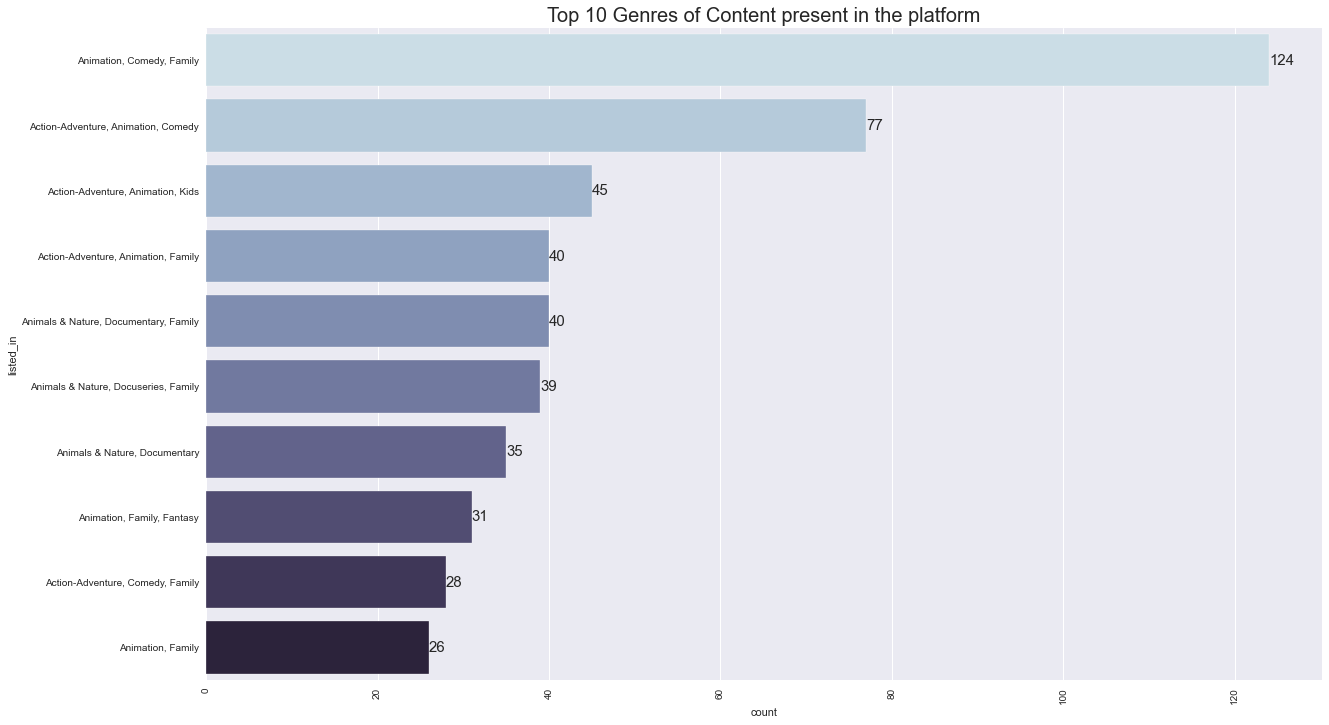

In [11]:
plt.figure(figsize=(20, 12))
plt.title("Top 10 Genres of Content present in the platform",fontsize=20)
c1=sb.countplot(y='listed_in',data=data,palette="ch:s=.25,rot=-.25",order=data.listed_in.value_counts().iloc[:10].index)
c1.bar_label(c1.containers[0],size = 15)
plt.xticks(rotation=90)
plt.show()

#### Number of movies & tv shows in 10 last years

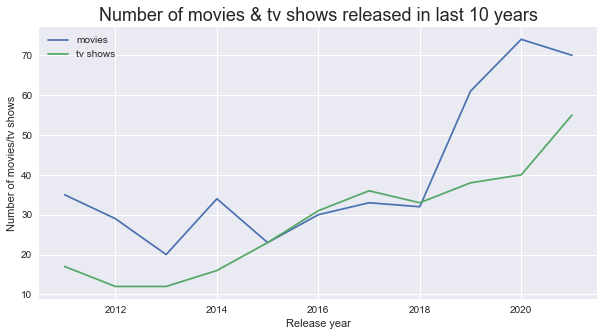

In [12]:
rl_years_comp = data[['release_year', 'type']]
rl_years_comp = rl_years_comp[rl_years_comp['release_year'] >= 2011]
recent_rl_shows = rl_years_comp[rl_years_comp['type'] == 'TV Show']
recent_rl_shows = recent_rl_shows['release_year'].value_counts().reset_index().sort_values('index', ascending=True)
recent_rl_movies = rl_years_comp[rl_years_comp['type'] == 'Movie']
recent_rl_movies = recent_rl_movies['release_year'].value_counts().reset_index().sort_values('index', ascending=True)

plt.figure(figsize=(10,5))
sb.lineplot(data=recent_rl_movies, x='index', y='release_year', label='movies')
sb.lineplot(data=recent_rl_shows, x='index', y='release_year', label='tv shows')
plt.title('Number of movies & tv shows released in last 10 years', fontsize=18)
plt.xlabel('Release year')
plt.ylabel('Number of movies/tv shows')
plt.show()

#### We rename the column listed_in to genre.

In [13]:
data = data.rename(columns={"listed_in":"genre"})

#### Number of content by genres

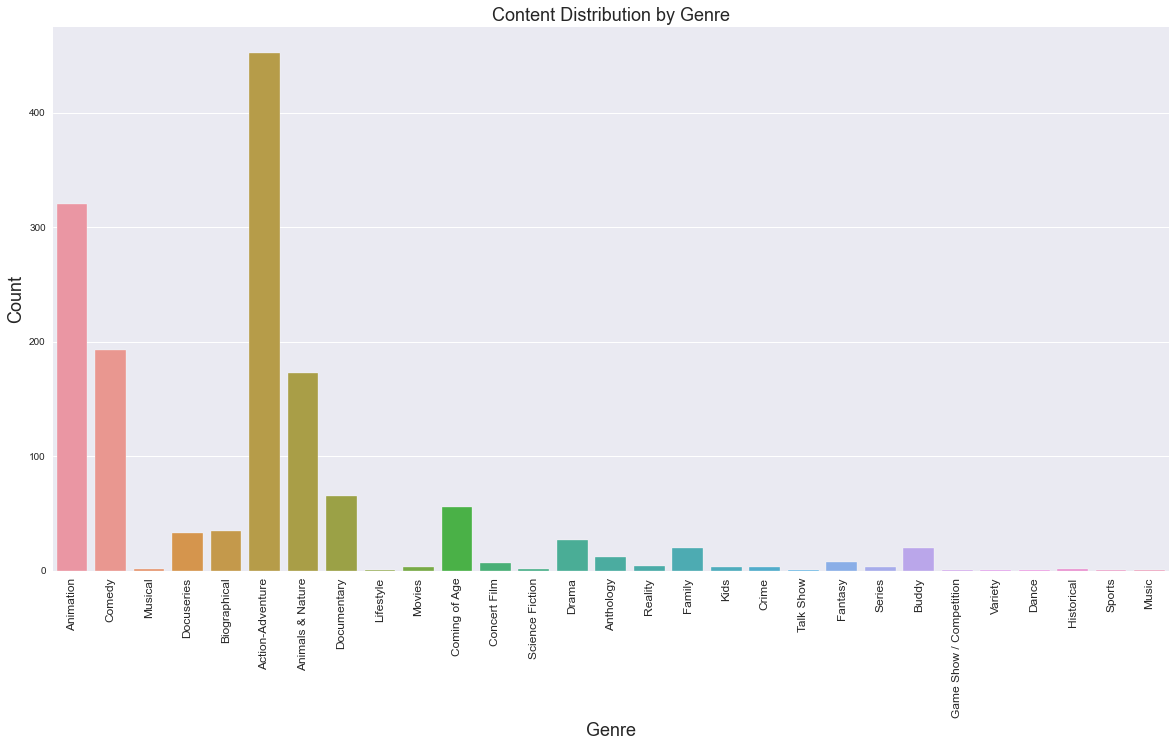

In [14]:
genre = data['genre'].apply(lambda x: x.split(",")[0])

plt.figure(figsize=(20, 10));
plt.title("Content Distribution by Genre",fontsize=18);
plt.xticks(rotation=90,fontsize=12)
sb.countplot(genre);
plt.ylabel('Count',fontsize=18);
plt.xlabel('Genre',fontsize=18);
plt.show();

**NOTE**<br/>
It was desired to create a graph or heat map for these values. However, an understandable output could not be obtained because the number of categories was too large.

# <span style="color: red;">Recommendation System by Multiple Features</span>

**#** First of all, we create a filter to create metadata soup. We will use that metadata soup to feed to our vectorizer. The metadata soup contains all the metadata to feed process.

In [15]:
filters = data[['genre', 'cast', 'description', 'title']]

**#** We clean the text to create metadata soup.

In [16]:
features=['genre','cast','description','title']
for feature in features:
    filters[feature] = filters[feature].apply(cs.clean_text)

**#** We divide the data into 2 as training and testing.

In [17]:
length = (len(filters) * 4) // 5

#80 percent for training
X_train = filters[:length]

#20 percent for training
X_test = filters[length:]

**METADATA SOUP CREATED**

In [18]:
metadata_soup = cs.create_metadata_soup(X_train)

In [19]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata_soup)

In [20]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

**SORT BY GENRE**

In [21]:
filters.sort_values(by='genre').head(len(filters))

,genre,cast,description,title
1449,"action-adventure,animals&nature,animation",charlietahan,viewoneofsparky'sfavoritehomemovies.,captainsparkyvs.theflyingsaucers
1113,"action-adventure,animals&nature,comedy","dannyglover,rayliotta,denisleary,dougdoug,cori...",soldierssecretlytransportanelephantacross200mi...,operationdumbodrop
1407,"action-adventure,animals&nature,documentary",joshgoodman,"shapeshifting,dancing,dazzlingtransformers–bir...",wingedseduction:birdsofparadise
722,"action-adventure,animals&nature,documentary","dr.anatolysagalevitch,genyachernaiev,victornis...",jamescameronteamsupwithnasascientiststoexplore...,aliensofthedeep
964,"action-adventure,animals&nature,documentary",na,twofriendssetouttotraversethegrandcanyonbyfoot...,intothegrandcanyon
...,...,...,...,...
1213,series,na,whatdoesacuriouslittledroiddowhenhe'snotonadar...,starwars:blips
265,series,"matlucas,jamesarnoldtaylor,tomkane,greydelisle...","enjoythisthrilling,emmy®award-winninganimateds...",starwarsvintage:clonewars2dmicro-series
796,sports,"lukebenward,dovecameron,mikemanning,kierseycle...",twounlikelyfriendsmustovercomeself-doubttoachi...,cloud9
150,talkshow,robinroberts,robinrobertssitsdownwithiconichollywoodwomenfo...,turningthetableswithrobinroberts


In [22]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters = filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [44]:
def get_recommendations_new(title, cosine_sim):
    tmp = title
    title = title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    print("Your Content:", tmp)
    print("Recommendations:")
    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [59]:
get_recommendations_new('X-Men: Apocalypse', cosine_sim)

Your Content: X-Men: Apocalypse
Recommendations:


477                       X-Men: Days of Future Past
117                              X-Men: Dark Phoenix
50                                X-Men: First Class
530    Star Wars: The Rise of Skywalker (Episode IX)
675          Star Wars: The Last Jedi (Episode VIII)
233                                    The Bad Batch
130                                   Fantastic Four
377                                  The Mandalorian
981               Journey to the Center of the Earth
225                            X-Men: The Last Stand
Name: title, dtype: object